### 1. Import libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
# Create path
path = r'/Users/dana/Documents/Pew Research Reading Project/'

# import data
earlyyears = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','2014-2016.csv'),index_col=False)
lateryears = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_all3years.csv'),index_col=False)

In [3]:
earlyyears = earlyyears[['number_of_books_read','year']]

In [4]:
lateryears = lateryears[['number_of_books_read','year']]

In [5]:
data = pd.concat([earlyyears,lateryears])

In [6]:
# export for use in tableau
data.to_csv(os.path.join(path, '02 Data','Prepared Data', 'all6years.csv'))

In [7]:
data.head(5)

,number_of_books_read,year
0,6,2014
1,6,2014
2,48,2014
3,8,2014
4,80,2014


In [8]:
data.shape

(9616, 2)

In [9]:
data.columns

Index(['number_of_books_read', 'year'], dtype='object')

In [10]:
type(data)

pandas.core.frame.DataFrame

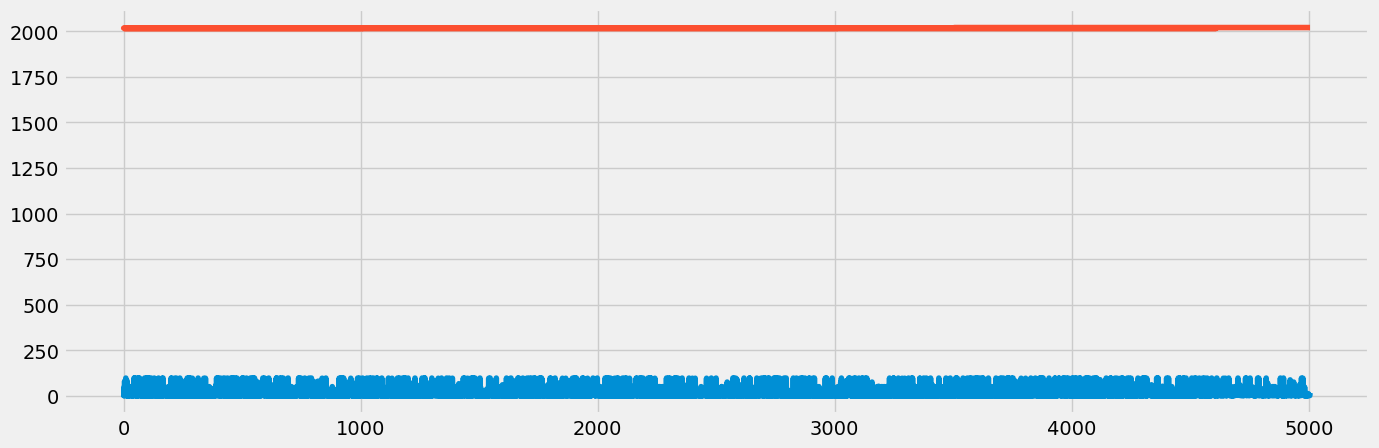

In [11]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

In [12]:
data['year'].value_counts()

2015    2004
2018    2002
2016    1601
2019    1502
2021    1502
2014    1005
Name: year, dtype: int64

In [13]:
# add day and month to year column so that I can use datetime based on the months given in survey data
data.loc[data['year'] == 2014, 'date'] = '2014-01-01'
data.loc[data['year'] == 2015, 'date'] = '2015-04-01'
data.loc[data['year'] == 2016, 'date'] = '2016-04-01'
data.loc[data['year'] == 2018, 'date'] = '2018-01-01'
data.loc[data['year'] == 2019, 'date'] = '2019-02-01'
data.loc[data['year'] == 2021, 'date'] = '2021-01-01'

In [14]:
data['date'].value_counts(dropna=False)

2015-04-01    2004
2018-01-01    2002
2016-04-01    1601
2019-02-01    1502
2021-01-01    1502
2014-01-01    1005
Name: date, dtype: int64

In [15]:
data['date'] = data['date'].astype('datetime64')

In [16]:
# Set the "Date" column as the index

data = data.set_index('date') # Set the datetime as the index of the dataframe.
data.drop(['year'], axis=1, inplace=True) # Drop the "year" column.
data.head()

,number_of_books_read
date,
2014-01-01,6
2014-01-01,6
2014-01-01,48
2014-01-01,8
2014-01-01,80


In [17]:
# Check for missing values 

data.isnull().sum() 

number_of_books_read    0
dtype: int64

In [18]:
data.shape

(9616, 1)

In [19]:
# Check for duplicates

dups = data.duplicated()
dups.sum()


9547

In [20]:
# there are a lot of duplicates but that's to be expected since I don't have unique datetime data

### 3. Time-series analysis: decomposition

In [21]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

In [ ]:
# Plot the separate components

decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [ ]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['number_of_books_read'])

In [ ]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

### 5. Stationarizing the Federal Reserve Economic Data

In [ ]:
data_diff = data - data.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [ ]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [ ]:
data_diff.head()

In [ ]:
data_diff.columns

In [ ]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [ ]:
dickey_fuller(data_diff)

In [ ]:
plot_acf(data_diff)
plt.show()